# 1. Data

In [71]:
# Import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [72]:
# Call DataFrame
df_as = pd.read_csv("Data/AStar_300.csv")
df_dfs = pd.read_csv("Data/DFS_300.csv")
df_ucs = pd.read_csv("Data/UCS_300.csv")
df_ida = pd.read_csv("Data/IDA_300.csv")

# Cost for each algorithm with Data = 300 (Convert PD to NP)
cost_as = df_as.iloc[:, 2].values
cost_dfs = df_dfs.iloc[:, 2].values + 100 # add 100
cost_ucs = df_ucs.iloc[:, 2].values
cost_ida = (df_ida.iloc[:, 2].values) 

In [73]:
(as_point, dfs_point, ucs_point, ida_point) = (0,0,0,0)

# Find order 1,2,3,4 for each data of algorithm
for index in range(300):
    # Store value 
    list_store_order = [cost_as[index], cost_dfs[index], cost_ucs[index], cost_ida[index]]
    max_a_line = max(cost_as[index], cost_dfs[index], cost_ucs[index], cost_ida[index])
    min_a_line = min(cost_as[index], cost_dfs[index], cost_ucs[index], cost_ida[index])
    
    # Delete max & min to find 2nd & 3rd
    list_store_order.remove(max_a_line)
    list_store_order.remove(min_a_line)

    # Find max 1
    if max_a_line in cost_as:
        as_point += 1
    elif max_a_line in cost_dfs:
        dfs_point += 1
    elif max_a_line in cost_ucs:
        ucs_point += 1
    elif max_a_line in cost_ida:
        ida_point += 1
    
    # Find min 4
    if min_a_line in cost_as:
        as_point += 4
    elif min_a_line in cost_dfs:
        dfs_point += 4
    elif min_a_line in cost_ucs:
        ucs_point += 4
    elif min_a_line in cost_ida:
        ida_point += 4
    
    # Find 2nd & 3rd
    order_2, order_3 = min(list_store_order), max(list_store_order)
    # Find 2nd
    if order_2 in cost_as:
        as_point += 3
    elif order_2 in cost_dfs:
        dfs_point += 3
    elif order_2 in cost_ucs:
        ucs_point += 3
    elif order_2 in cost_ida:
        ida_point += 3
    # Find 3rd
    if order_3 in cost_as:
        as_point += 2
    elif order_3 in cost_dfs:
        dfs_point += 2
    elif order_3 in cost_ucs:
        ucs_point += 2
    elif order_3 in cost_ida:
        ida_point += 2

In [74]:
[as_point, dfs_point, ucs_point, ida_point]

[919, 377, 732, 972]

# 2. Visualization

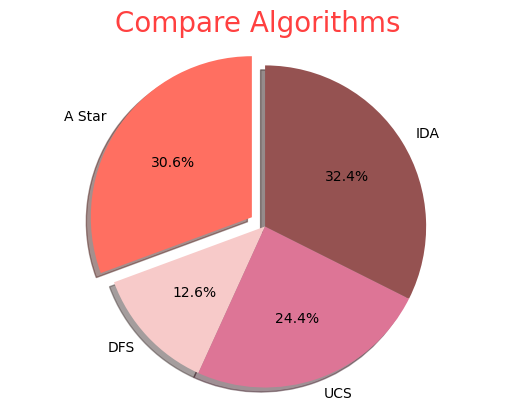

In [75]:
# Visualization Pie chart
labels = ('A Star', 'DFS', 'UCS', "IDA")
points = [as_point, dfs_point, ucs_point, ida_point]
# Create a set of colors
colors = ['#FF6F61', '#F7CAC9', '#DD7596', '#955251']

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0)
ax.pie(points, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=colors)
ax.axis('equal') 
plt.title("Compare Algorithms", fontsize= 20, c = "red", alpha = 0.75)
plt.show();

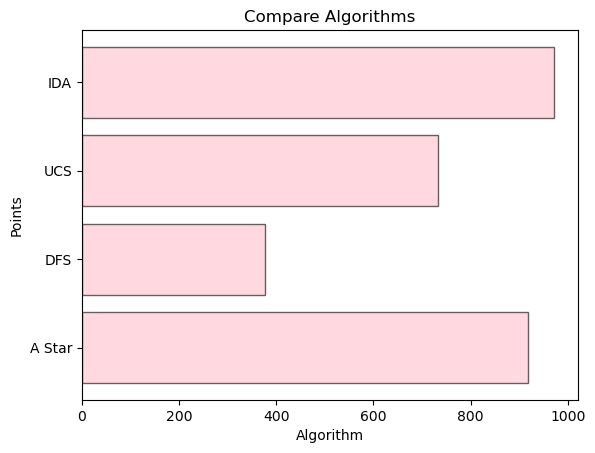

In [80]:
# Visualize BarH Chart
list_order = {"A Star" : as_point, "DFS" : dfs_point, "UCS": ucs_point, "IDA": ida_point,}
fig, ax = plt.subplots()
ax.barh(list(list_order.keys()), list(list_order.values()), color = "pink", edgecolor = "black", alpha = 0.6)
ax.set(title = "Compare Algorithms", xlabel = 'Algorithm', ylabel = 'Points')
plt.show();